In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Problem 1.

Apply alternating minimisation method to solve $min \ \frac{1}{2}||x||_2^2 + \lambda ||y||_1$ subject to $Ax + y = b$. Let $A \in \mathbb{R}^{200 \times 1000}$. Let $x \in \mathbb{R}^{1000 \times 1}$ be sparse with 20 non-zero components in random locations. Let $b = Ax$ and $\lambda = 1$. Solve with different step sizes and plot to compare.

In [2]:
random.seed(14)

A = np.random.normal(0, 1, size=(200, 1000))

x_vals = np.random.normal(0, 1, 10)
x = np.zeros(shape=(1000,1))
indices = np.random.randint(0, high=1000, size=10)
for i,k in zip(list(indices),range(0,10)):
    x[i] = x_vals[k]

b = np.dot(A, x)
lamb = 1

In [3]:
def objective_function(x, y, lamb):
    return .5 * np.linalg.norm(x, 2)**2 + lamb * np.linalg.norm(y,1)

def dual_prox_grad(x, A, b, max_iter, step, lamb):
    m, n = A.shape
    x_n = np.zeros(shape=(n, 1))
    y_m = np.zeros(shape=(m, 1))

    results = []

    for i in range(max_iter):
        x_n = np.linalg.inv(np.eye(n) + step * np.dot(A.T, A))@np.dot(step * A.T, b - y_m)
        y_m = np.sign(b - np.dot(A, x_n)) * np.maximum(np.abs(b - np.dot(A, x_n)) - lamb, 0)
        
        results.append(objective_function(x_n, y_m, lamb))

    return x_n, y_m, results


In [4]:
steps = [1e-2, 1e-4, 1e-6]

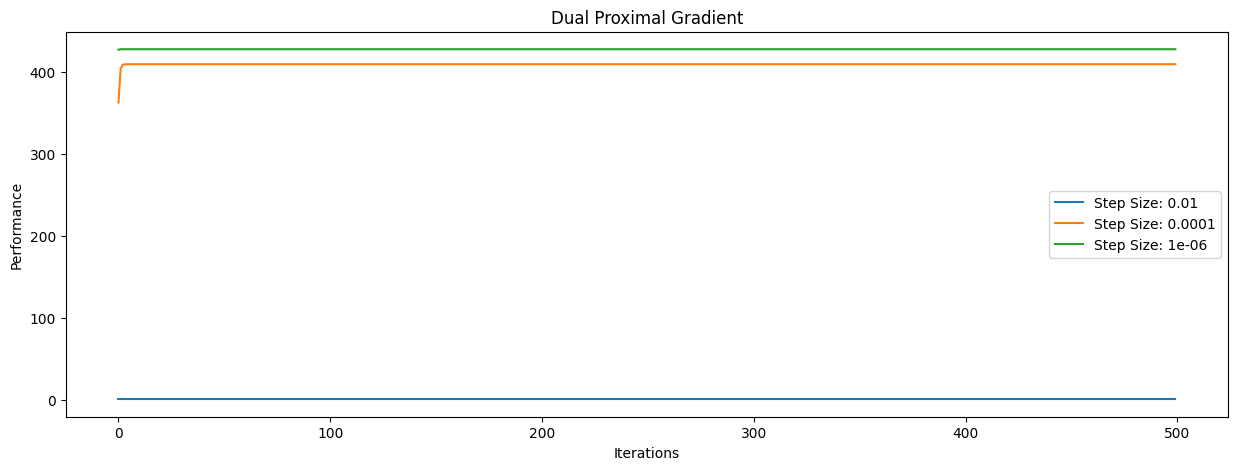

In [15]:
plt.figure(figsize=(15,5))

for s in steps:
    x, y, performances = dual_prox_grad(x, A, b, max_iter=500, step=s, lamb=lamb)
    plt.plot(performances, label=f"Step Size: {s}")

plt.xlabel("Iterations")
plt.ylabel("Performance")
plt.title('Dual Proximal Gradient')
plt.legend()
plt.show()

# Problem 2.

Let $A \in \mathbb{R}^{2000 \times 100}$ and $x \in \mathbb{R}^{100 \times 1}$. Let $b = Ax$ and solve $Ax = b$ with probability $p_i = \frac{||A(i,:)||_2^2}{||A||_F^2}$ for choosing the $i$ th row. Plot the errors $||x-x_k||_2$.

In [29]:
random.seed(12)

A = np.random.normal(0, 1, size=(2000, 100))

x = np.random.normal(0, 1, size=100)

b = np.dot(A, x)

m, n = A.shape

In [30]:
def solve_kaczmarz(A, b, x, TOL=1.e-6):

    X_k = np.zeros(n)
    errors = []

    p = (np.linalg.norm(A, axis=1)**2) / (np.linalg.norm(A, ord='fro')**2
)
    while True:
            i = np.random.choice(m, p=p)
            ai = A[i,:]
            X_k = X_k + ((b[i] - ai @ X_k) / np.linalg.norm(ai)**2) * ai.reshape(-1, 1)
            err = np.linalg.norm(x - X_k)
            errors.append(err)
            if err < TOL:
                break

    return X_k, errors


In [13]:

def plot_trajectory(Xhistory):
    x = np.linspace(-5, 5, 2)
    M = np.vstack((x, np.ones(2))).T
    for i in range(m):
        print(f"M.shape : {M.shape}")
        print(f"A.shape : {A.shape}")
        print(f"b.shape : {b.shape}")
        y = M @ (-A[i,0], b[i]) / A[i,1]
        plt.plot(x, y)

    plt.plot(Xhistory[:,0], Xhistory[:,1], 'k-o')
    plt.axis('square')
    plt.xlim(-2.0,0.5)
    plt.ylim(-0.5,2.0)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_errors(err_history):
    plt.figure(figsize=(15,5))
    plt.plot(err_history)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Randomized Kaczmarz')
    plt.show()

In [31]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [ ]:
x, errors= solve_kaczmarz(A, b, x, 1.e-2)

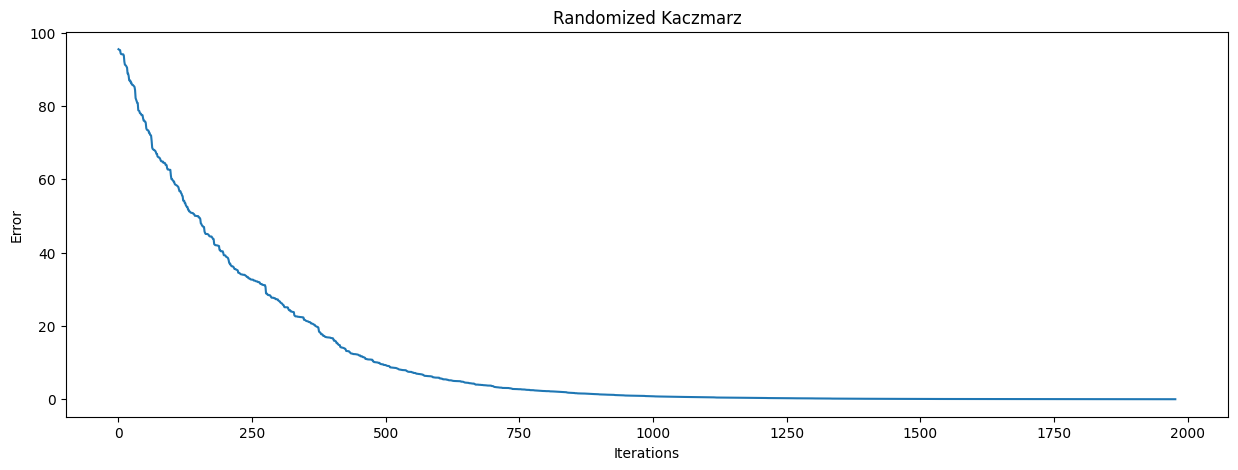

In [111]:

#plot_trajectory(x_hist)
plot_errors(errors)